In [1]:
import pandas as pd

In [2]:
links = pd.read_csv('links.csv')
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')
tags = pd.read_csv('tags.csv')

In [3]:
ratings['userId'].nunique()


610

In [4]:
# Group the ratings by movieId and count the number of ratings for each movie
ratings_count = ratings.groupby('movieId').size().reset_index(name='rating_count')

# Merge the ratings count with the movies dataframe to get movie titles
movies_with_ratings = pd.merge(ratings_count, movies, on='movieId')

# Find the movie with the maximum number of ratings
most_rated_movie = movies_with_ratings.loc[movies_with_ratings['rating_count'].idxmax()]

most_rated_movie


movieId                              356
rating_count                         329
title                Forrest Gump (1994)
genres          Comedy|Drama|Romance|War
Name: 314, dtype: object

In [5]:
# Find the movieId for "Matrix, The (1999)"
matrix_movie_id = movies[movies['title'] == "Matrix, The (1999)"]['movieId'].values[0]

# Filter tags associated with "Matrix, The (1999)" using the movieId
matrix_tags = tags[tags['movieId'] == matrix_movie_id]

matrix_tags


,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [6]:
# Find the movieId for "Terminator 2: Judgment Day (1991)"
terminator_movie_id = movies[movies['title'] == "Terminator 2: Judgment Day (1991)"]['movieId'].values[0]

# Filter ratings for "Terminator 2: Judgment Day (1991)" using the movieId
terminator_ratings = ratings[ratings['movieId'] == terminator_movie_id]

# Calculate the average rating
average_rating = terminator_ratings['rating'].mean()

average_rating


3.970982142857143

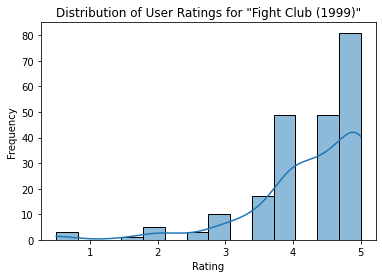

-1.8603186380018706

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Find the movieId for "Fight Club (1999)"
fight_club_movie_id = movies[movies['title'] == "Fight Club (1999)"]['movieId'].values[0]

# Filter ratings for "Fight Club (1999)" using the movieId
fight_club_ratings = ratings[ratings['movieId'] == fight_club_movie_id]

# Plot the distribution of the ratings
sns.histplot(fight_club_ratings['rating'], kde=True)
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Check the skewness of the distribution
skewness = fight_club_ratings['rating'].skew()

skewness


In [8]:
# Calculate the average rating for each movie
average_ratings = ratings.groupby('movieId')['rating'].mean().reset_index(name='average_rating')

# Merge with the movies dataframe to get movie titles
movies_with_avg_ratings = pd.merge(average_ratings, movies, on='movieId')

# Find the movie with the highest average rating
most_popular_movie = movies_with_avg_ratings.loc[movies_with_avg_ratings['average_rating'].idxmax()]

most_popular_movie


movieId                        53
average_rating                5.0
title             Lamerica (1994)
genres            Adventure|Drama
Name: 48, dtype: object

In [9]:
# List of the movies to compare
movies_to_compare = ["Godfather, The (1972)", "Shawshank Redemption, The (1994)", "Jumanji (1995)", "Wolf of Wall Street, The (2013)"]

# Get the movieIds for the selected movies
movie_ids = movies[movies['title'].isin(movies_to_compare)]['movieId']

# Filter the ratings for the selected movies
selected_movies_ratings = ratings[ratings['movieId'].isin(movie_ids)]

# Calculate the average ratings for each movie
average_ratings = selected_movies_ratings.groupby('movieId')['rating'].mean().reset_index()

# Merge with movies dataframe to get the titles
average_ratings_with_titles = pd.merge(average_ratings, movies, on='movieId')

# Find the movie with the highest average rating
most_popular_movie = average_ratings_with_titles.loc[average_ratings_with_titles['rating'].idxmax()]

most_popular_movie[['title', 'rating']]


title     Shawshank Redemption, The (1994)
rating                            4.429022
Name: 1, dtype: object

In [10]:
# List of the movies to compare
movies_to_check = ["Pulp Fiction (1994)", "Bad Boys (1995)", "Silence of the Lambs, The (1991)", "Matrix, The (1999)"]

# Get the movieIds for the selected movies
movie_ids_to_check = movies[movies['title'].isin(movies_to_check)]['movieId']

# Filter the ratings for the selected movies
selected_movies_ratings_counts = ratings[ratings['movieId'].isin(movie_ids_to_check)].groupby('movieId').size().reset_index(name='rating_count')

# Merge with movies dataframe to get the titles
selected_movies_with_titles = pd.merge(selected_movies_ratings_counts, movies, on='movieId')

# Find the top 5 movies based on the number of user ratings
top_5_movies = movies_with_ratings.nlargest(5, 'rating_count')

# Check which of the selected movies are in the top 5
selected_movies_in_top_5 = selected_movies_with_titles[selected_movies_with_titles['movieId'].isin(top_5_movies['movieId'])]

selected_movies_in_top_5[['title', 'rating_count']]


,title,rating_count
1,Pulp Fiction (1994),307
2,"Silence of the Lambs, The (1991)",279
3,"Matrix, The (1999)",278


In [19]:
# Count the number of ratings for each Sci-Fi movie
sci_fi_ratings_count = sci_fi_ratings.groupby('movieId')['rating'].count()

# Find the third most popular Sci-Fi movie based on the number of ratings
third_most_popular_sci_fi_movie_id = sci_fi_ratings_count.nlargest(3).index[-1]

# Get the title of the third most popular Sci-Fi movie
third_most_popular_sci_fi_movie = movies[movies['movieId'] == third_most_popular_sci_fi_movie_id]['title'].values[0]

third_most_popular_sci_fi_movie_id, third_most_popular_sci_fi_movie



(32, 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)')

In [12]:
# Calculate the average rating for each movie
average_ratings = ratings.groupby('movieId')['rating'].mean()

# Find the movieId with the highest average rating
highest_rated_movie_id = average_ratings.idxmax()
highest_rating = average_ratings.max()

highest_rated_movie_id, highest_rating


(53, 5.0)

In [13]:
# Filter movies that belong to the "Sci-Fi" genre
sci_fi_movies = movies[movies['genres'].str.contains('Sci-Fi', case=False, na=False)]

# Merge with the average ratings to get ratings for only "Sci-Fi" movies
sci_fi_ratings = sci_fi_movies.merge(average_ratings, on='movieId')

# Find the "Sci-Fi" movie with the highest average rating
highest_rated_sci_fi_movie_id = sci_fi_ratings.loc[sci_fi_ratings['rating'].idxmax(), 'movieId']
highest_sci_fi_rating = sci_fi_ratings['rating'].max()

highest_rated_sci_fi_movie_id, highest_sci_fi_rating


(3687, 5.0)